# UNNA BAKERY SALES DATA ANALYSIS 

In [120]:
#importing required packages

import numpy as np
import pandas as pd

import datetime

#packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
#to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [94]:
#reading multiple data sheets into a dictionary

df_sales = pd.read_excel('/Users/shrutitelang/Documents/CREWASIS/Projects/Unna Bakery Sales/Data/Raw data/Sales.xlsx',sheet_name=None)

In [95]:
#assigning dictionary keys to a list
sheets=list(df_sales.keys())

#displaying data sheet names
print(sheets)

['Feb 2018', 'March 2018', 'April 2018', 'May 2018', 'June 2018', 'July 2018', 'August 2018', 'September 2018', 'October 2018', 'November 2018', 'December 2018', 'January 2019', 'February 2019', 'March 2019', 'April 2019', 'May 2019', 'June 2019', 'July 2019', 'August 2019', 'Sept 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'March 2020', 'April 2020', 'May 2020', 'July 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020', 'June 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021']


In [96]:
#dataframe attribute data types

df_sales['Oct 2020'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Document Number           352 non-null    float64       
 1   Posting Date              352 non-null    datetime64[ns]
 2   Customer/Vendor Code      352 non-null    object        
 3   Customer/Vendor Name      352 non-null    object        
 4   Ship-to Street            352 non-null    object        
 5   Ship-to City              352 non-null    object        
 6   Ship-to State             352 non-null    object        
 7   Ship-to Zip Code          352 non-null    float64       
 8   Credit Hold               352 non-null    object        
 9   Warehouse Name            352 non-null    object        
 10  Group Name                352 non-null    object        
 11  Item No.                  352 non-null    float64       
 12  Item/Service Descripti

## TASK 1 - Data Cleaning

In [97]:
#View_1
df_sales['October 2018'].head(2)

,Customer code,Brand,Ship Date,Customer Name,Address On File,itemcode,ItemName,UPC,Quantity
0,C10470,Unna Bakery,2018-10-01,"Hudson Greene Market (Jersey City, NJ)",77 Hudson Street Jersey City NJ 07302,188102.0,Unna Bake - Farmer's Cookie (6 x 3.4 OZ),8.601850e+11,1
1,C10470,Unna Bakery,2018-10-01,"Hudson Greene Market (Jersey City, NJ)",77 Hudson Street Jersey City NJ 07302,188103.0,**DISCO**Unna Bake - Chocolate Caramel Cookie(...,8.601850e+11,1


In [98]:
#View_2
df_sales['Feb 2020'].head(2)

,Document Number,Posting Date,Customer/Vendor Code,Customer/Vendor Name,Street,City,State,Zip Code,Credit Hold,Warehouse Name,Group Name,Item No.,Item/Service Description,Group Name.1,Quantity,Total Sales $,Sales Employee Name
0,3500282.0,2020-02-01,C11313,WFM - NE CLO - CLOSTER,33 Vervalen Street,Closter,NJ,7624.0,N,New Jersey,1001_WFM NE,188502.0,Unna Bakery - Lemon Lime - (6 x 5.5 OZ),Dry Specialty,1,0.0,House Account
1,3500282.0,2020-02-01,C11313,WFM - NE CLO - CLOSTER,33 Vervalen Street,Closter,NJ,7624.0,N,New Jersey,1001_WFM NE,188503.0,Unna Bakery - Coconut Oat - (6 x 5.5 OZ),Dry Specialty,1,0.0,House Account


In [99]:
#View_3
df_sales['April 2020'].head(2)

,Document Number,Posting Date,Customer/Vendor Code,Customer/Vendor Name,Ship-to Street,Ship-to City,Ship-to State,Ship-to Zip Code,Credit Hold,Warehouse Name,Group Name,Item No.,Item/Service Description,Group Name.1,Quantity,Total Sales $,Sales Employee Name
0,3538552.0,2020-04-01,C12328,MOM's Organic Market - Alexandria,3831 Mt. Vernon Ave,Alexandria,VA,22305.0,N,Maryland,2018_MOMs,188201.0,Unna Bake -Raspberry Cave cookie 2 pack (12 x ...,Dry Snacks,1,13.6,House Account
1,3538552.0,2020-04-01,C12328,MOM's Organic Market - Alexandria,3831 Mt. Vernon Ave,Alexandria,VA,22305.0,N,Maryland,2018_MOMs,188204.0,Unna Bake -Coconut Oat 2-pack - (12 x 1 OZ),Dry Snacks,1,13.6,House Account


## 'View_1', 'View_2' and 'View_3' depict column variation in sheets. We therefore create three dataframes and work on them separately first.

In [100]:
#For View_1

#creating a list of dataframes for category 1
list1=[df_sales['Feb 2018'], df_sales['March 2018'], df_sales['April 2018'], df_sales['May 2018'], 
       df_sales['June 2018'], df_sales['July 2018'], df_sales['August 2018'], df_sales['September 2018'],df_sales['October 2018']]

#dataframe concatination
result1=pd.concat(list1)

#---------------------------------------------------------------------------------------------------------------------------------------

#creating a list of dataframes for category 2
list2=[df_sales['November 2018'], df_sales['December 2018'], df_sales['January 2019'], df_sales['February 2019'], 
       df_sales['March 2019'], df_sales['April 2019'], df_sales['May 2019'], df_sales['June 2019'], df_sales['July 2019'], 
       df_sales['August 2019'], df_sales['Sept 2019'], df_sales['Oct 2019'], df_sales['Nov 2019'], df_sales['Dec 2019'], 
       df_sales['Jan 2020'], df_sales['Feb 2020'], df_sales['March 2020']]

#dataframe concatination
result2=pd.concat(list2)

#---------------------------------------------------------------------------------------------------------------------------------------

#creating a list of dataframes for category 3
list3=[df_sales['April 2020'], df_sales['May 2020'], 
       df_sales['July 2020'], df_sales['Aug 2020'], df_sales['Sept 2020'], df_sales['Oct 2020'], df_sales['June 2020'], 
       df_sales['Nov 2020'], df_sales['Dec 2020'], df_sales['Jan 2021'], df_sales['Feb 2021']]

#dataframe concatination
result3=pd.concat(list3)

## 1. For data uptil October 2018 

In [101]:
#dropping the final row with NaN values. We also drop column 'Brand' as it does not contain any unique names but **Unna Bakery**

#displaying NaN value count
print('NaN value count =',result1.isnull().sum().sum())

result1.dropna(inplace=True)
result1.drop(columns={'Brand'},inplace=True)

df_feb18_oct18=result1

NaN value count = 80


## 2. For data from November 2018 through March 2020

In [102]:
#results2 dataframe contains address attributes which need to be merged into a single column

result2['Zip Code']=result2['Zip Code'].astype(str) #converting zip code column from float to int
result2['Zip Code']=result2['Zip Code'].str.replace('.','s') #replacing decimal point in zipcode as object column
result2['Zip Code']=result2['Zip Code'].str.replace('s0','') #removing decimal point and trailing 0

result2['Address'] = result2['Street']+" "+result2['City']+" "+result2['State']+" "+result2['Zip Code'] #concatinating address attributes into a single address

#column swapping within results2 dataframe
result2['Street']=result2['Address']
result2.rename(columns={'Street':'Address On File'},inplace=True) 

In [103]:
#dropping respective address attribute columns as these are unecessary. Also renaming a few columns for uniformity

result2.drop(columns={'City','State','Zip Code','Address'},inplace=True)

result2.rename(columns={'Customer/Vendor Code':'Customer code','Customer/Vendor Name':'Customer Name',
                        'Item No.':'itemcode','Item/Service Description':'ItemName','Group Name.1':'GroupName'},inplace=True)

#displaying NaN value count
print('NaN value count =',result2.isnull().sum().sum())

#dropping NaN values as the significant details for product are missing
result2.dropna(inplace=True)

NaN value count = 224


## 3. For data from April 2020 through February 2021

In [104]:
#results3 dataframe contains address attributes which need to be merged into a single column

#renaming address attribute columns
result3.rename(columns={'Ship-to Street':'Street','Ship-to City':'City','Ship-to State':'State','Ship-to Zip Code':'Zip Code'},inplace=True)

result3['Zip Code']=result3['Zip Code'].astype(str) #converting zip code column from float to int
result3['Zip Code']=result3['Zip Code'].str.replace('.','s') #replacing decimal point in zipcode as object column
result3['Zip Code']=result3['Zip Code'].str.replace('s0','') #removing decimal point and trailing 0

result3['Address'] = result3['Street']+" "+result3['City']+" "+result3['State']+" "+result3['Zip Code'] #concatinating address attributes into a single address

#displaying NaN value count


#column swapping within results3 dataframe
result3['Street']=result3['Address']
result3.rename(columns={'Street':'Address On File'},inplace=True) 

In [105]:
#dropping respective address attribute columns as these are unecessary. Also renaming a few columns for uniformity

result3.drop(columns={'City','State','Zip Code','Address'},inplace=True)

result3.rename(columns={'Customer/Vendor Code':'Customer code','Customer/Vendor Name':'Customer Name',
                        'Item No.':'itemcode','Item/Service Description':'ItemName','Group Name.1':'GroupName'},inplace=True)

#displaying NaN value count
print('NaN value count =',result3.isnull().sum().sum())

#dropping NaN values as the significant details for product are missing
result3.dropna(inplace=True)

NaN value count = 132


In [106]:
#Merging result2 and result3

year_list=[result2,result3]
df_nov18_feb21=pd.concat(year_list)


In [107]:
df_feb18_oct18.shape

(1473, 8)

In [108]:
df_nov18_feb21.shape

(6912, 14)

In [109]:
#removing '.' from address column in  df_feb18_oct18 and 21df_nov18_feb21

df_feb18_oct18['Address On File']=df_feb18_oct18['Address On File'].str.replace('.','')
df_nov18_feb21['Address On File']=df_nov18_feb21['Address On File'].str.replace('.','')

#modifying item names in data from Feb 2018 to Oct 2018
df_feb18_oct18['ItemName']=df_feb18_oct18['ItemName'].str.replace('Unna Bake -','')
df_feb18_oct18['ItemName']=df_feb18_oct18['ItemName'].str.replace(r' \(.*\)','').str.replace('-','').str.replace(r'\([^()]*\)', '')
df_feb18_oct18['ItemName']=df_feb18_oct18['ItemName'].str.strip()

#modifying item names in data from Nov 2018 to Feb 2021
df_nov18_feb21['ItemName']=df_nov18_feb21['ItemName'].str.replace('\(.*?\)','()')
df_nov18_feb21['ItemName']=df_nov18_feb21['ItemName'].str.replace('Unna Bake -','').str.replace('Unna Bakery -','')
df_nov18_feb21['ItemName']=df_nov18_feb21['ItemName'].str.replace('(','b')
df_nov18_feb21['ItemName']=df_nov18_feb21['ItemName'].str.replace(')','')
df_nov18_feb21['ItemName']=df_nov18_feb21['ItemName'].str.replace('b','')
df_nov18_feb21['ItemName']=df_nov18_feb21['ItemName'].str.replace('-','')
df_nov18_feb21['ItemName']=df_nov18_feb21['ItemName'].str.strip()

In [110]:
df_feb18_oct18.head(2)

,Customer code,Ship Date,Customer Name,Address On File,itemcode,ItemName,UPC,Quantity
0,C13311,2018-02-03,Quincy,331 Nostrand Ave Brooklyn NY 11216,188101.0,Raspberry Cave cookie,8.601850e+11,1
1,C13311,2018-02-03,Quincy,331 Nostrand Ave Brooklyn NY 11216,188102.0,Farmer's Cookie,8.601850e+11,1


In [111]:
df_nov18_feb21.head(2)

,Document Number,Posting Date,Customer code,Customer Name,Address On File,Credit Hold,Warehouse Name,Group Name,itemcode,ItemName,GroupName,Quantity,Total Sales $,Sales Employee Name
0,3236367.0,2018-11-01,C10337,Foragers City Grocer - Brooklyn,56 Adams Street Brooklyn NY 11201,N,New Jersey,3002_Brooklyn Indie,188401.0,Ginger Snap & Vanilla Dream,Dry Snacks,1,52.0,Alejandro Lopez
1,3236367.0,2018-11-01,C10337,Foragers City Grocer - Brooklyn,56 Adams Street Brooklyn NY 11201,N,New Jersey,3002_Brooklyn Indie,188302.0,Lemon Lime,Dry Snacks,1,27.8,Alejandro Lopez


## TASK 2 - Exploratory Data Analysis

### 1. Line chart depicting Sales made by Unna Bakery from November 2018 through February 2021

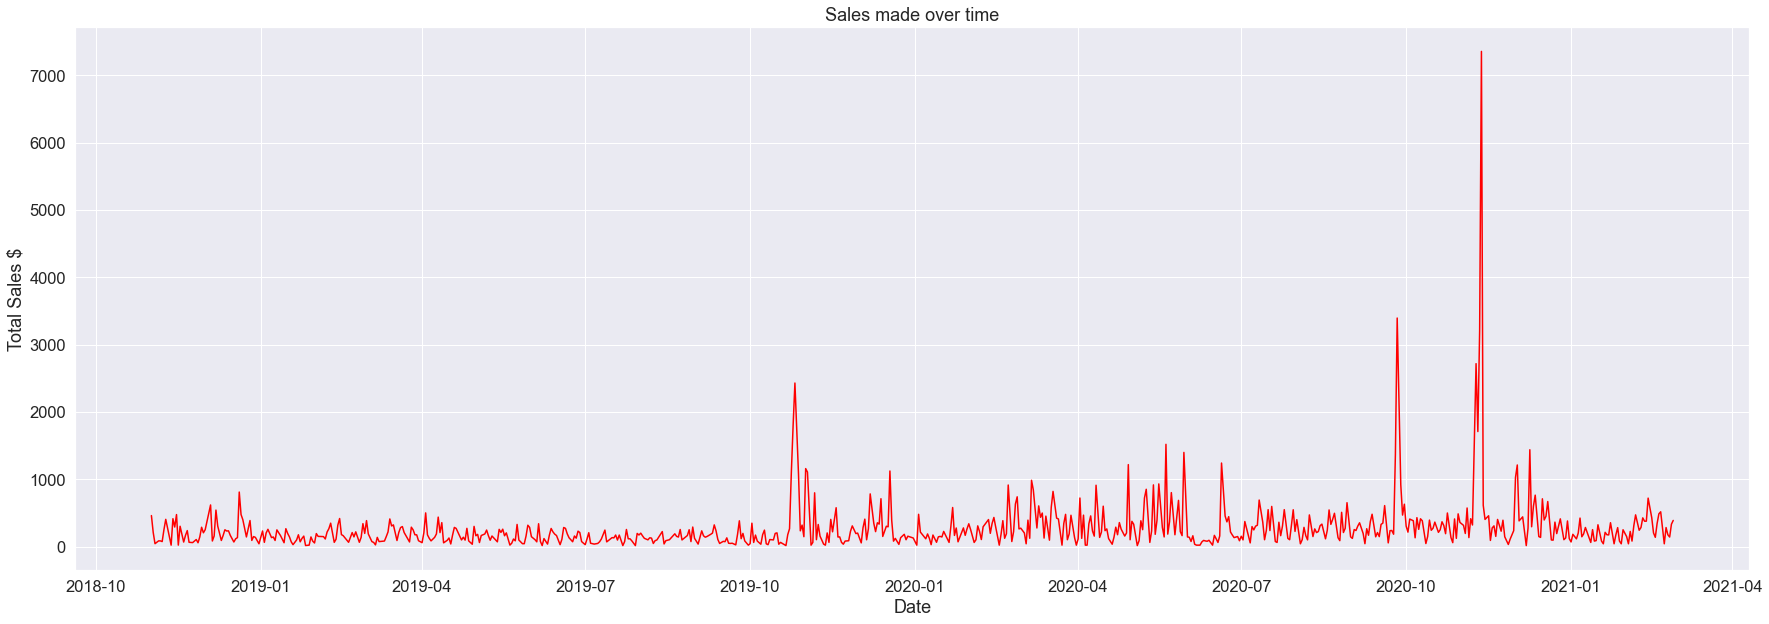

In [112]:
#grouping dates to get total sales for every day
df_time_sales=df_nov18_feb21.groupby('Posting Date').sum()

sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale = 1.5)
a=sns.lineplot(data=df_time_sales,x='Posting Date',y='Total Sales $',color='red',palette='coolwarm').set(title="Sales made over time",xlabel="Date")
sns.set_style('darkgrid')

 ### 2. Total monthly sales made by Unna Bakery Products 2018 - 2021   

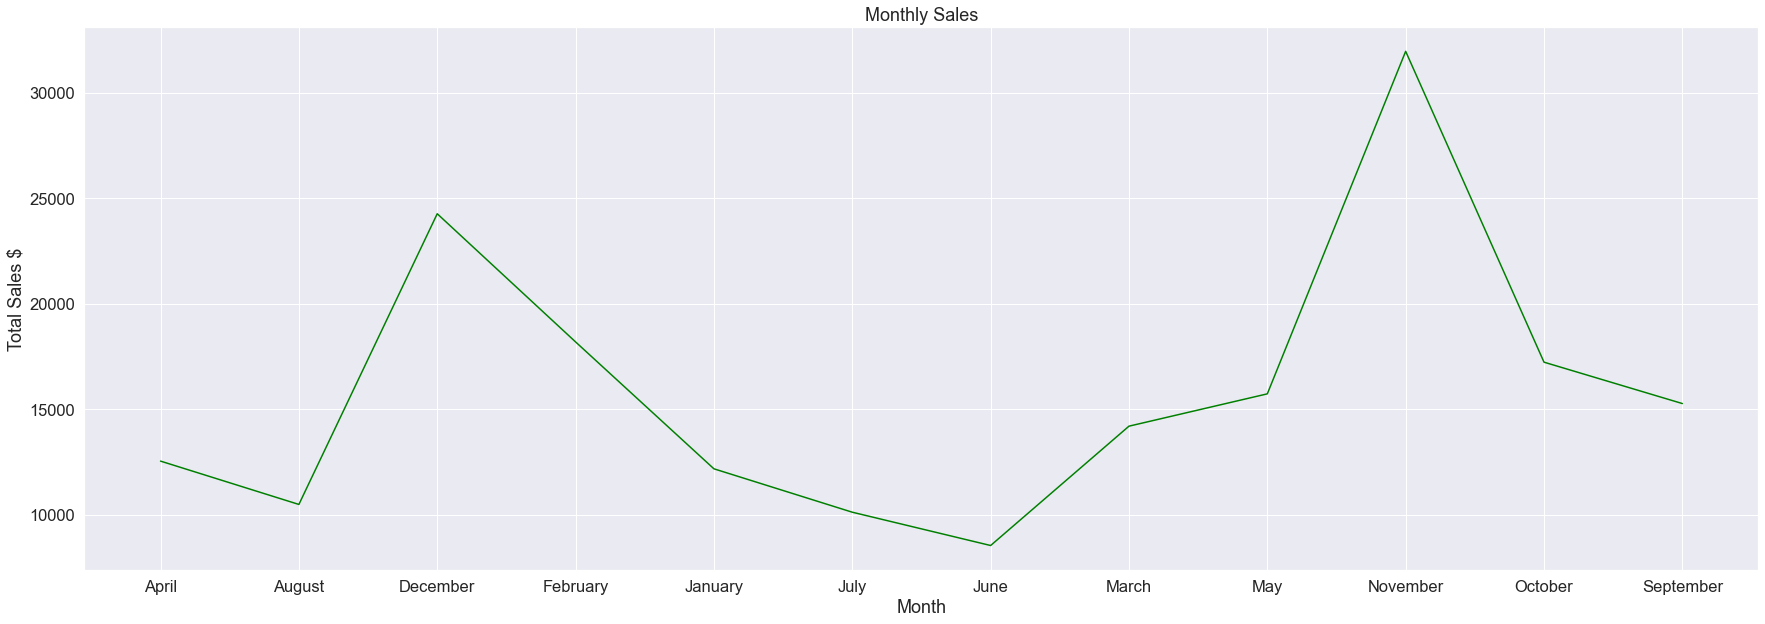

In [181]:
#getting month name for corresponding posting dates
df_nov18_feb21['Month']=df_nov18_feb21['Posting Date'].dt.month_name()

#grouping months to get total sales per month
df_mon_sales=df_nov18_feb21.groupby('Month').sum()

#line chart for total monthly sales
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale = 1.5)
a=sns.lineplot(data=df_mon_sales,x='Month',y='Total Sales $',color='green').set(title="Monthly Sales",xlabel="Month")
sns.set_style('darkgrid')

### 3. Weekly sales made by Unna Bakery items from 2018 - 2021

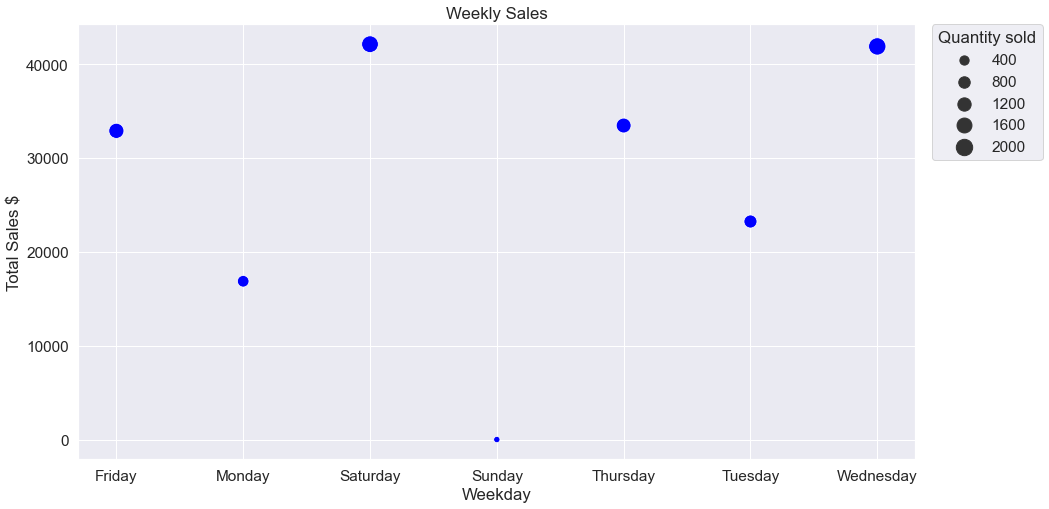

In [191]:
#getting month name for corresponding posting dates
df_nov18_feb21['Weekday']=df_nov18_feb21['Posting Date'].dt.day_name()

#grouping weekdays for getting total days 
df_week_sales=df_nov18_feb21.groupby('Weekday').sum()

#adding grouped attribute from index to column
df_week_sales.rename(columns = {'index':'new column name'},inplace=True)

df_week_sales.reset_index(inplace=True) #reset index

#line chart for total weekly sales

sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale = 1.4)
a=sns.scatterplot(data=df_week_sales,x='Weekday',y='Total Sales $',size='Quantity',sizes=(40, 300),color='blue').set(title="Weekly Sales",xlabel="Weekday")
plt.legend(title='Quantity sold',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.set_style('darkgrid')


### 4. Pieplot depicting percentage of different Snack categories sold

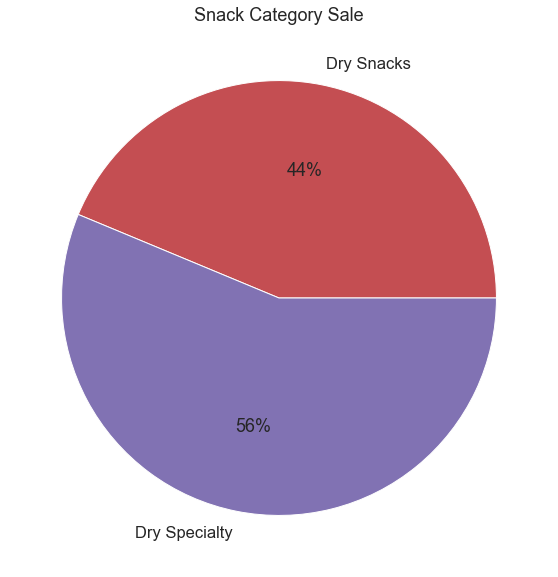

In [113]:
from seaborn import palettes

#grouping data by snack category and counting 
df_type_quant=df_nov18_feb21.groupby('GroupName').sum()

df_type_quant.reset_index(inplace=True) #reset index

#adding grouped attribute from index to column
df_type_quant.rename(columns = {'index':'new column name'},inplace=True)

#pie plot
sns.set(font_scale = 1.5)
colors = sns.color_palette('deep')[3:11]
plt.pie(df_type_quant['Total Sales $'], labels = df_type_quant['GroupName'],autopct='%.0f%%',colors = colors)
plt.title("Snack Category Sale")
plt.show()

### 5. Horizonal Bar Chart depicting Average Sales achived by Unna Bakery items

<AxesSubplot:xlabel='Avg Sales', ylabel='Item Name'>

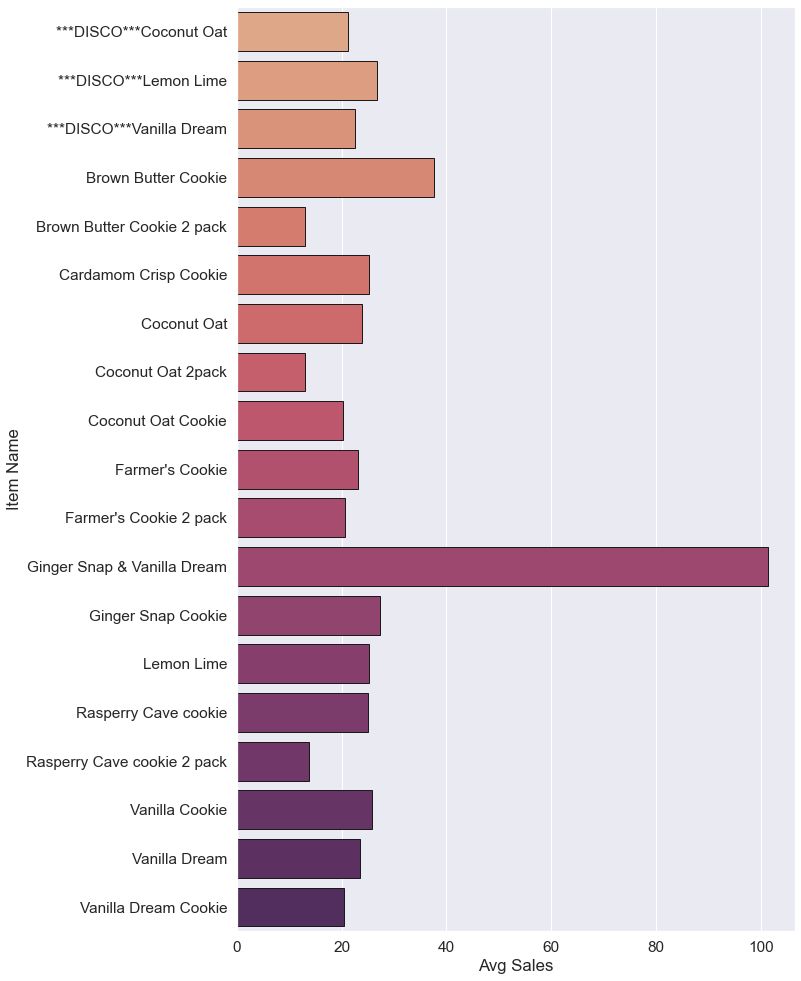

In [114]:
#grouping data by items sold by Unna Bakery
df_item_sales=df_nov18_feb21.groupby('ItemName').sum() #storing total sale 
df_item_quant=df_nov18_feb21.groupby('ItemName').count() #storing count

#calculating average sales for every item sold by Unna Bakery
plot_3 = pd.DataFrame()
plot_3['Item Name']=list(df_item_sales.index)
plot_3['Total Sales']=list(df_item_sales['Total Sales $'])
plot_3['Count']=list(df_item_quant['Total Sales $'])
plot_3['Avg Sales']=plot_3['Total Sales']/plot_3['Count']

#horizontal bar chart
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,17)})
sns.set(font_scale = 1.4)
sns.barplot( x = 'Avg Sales', y = 'Item Name',data = plot_3, palette="flare",edgecolor=".1")

### 6. Bar plot depicting total sale made by snack categories

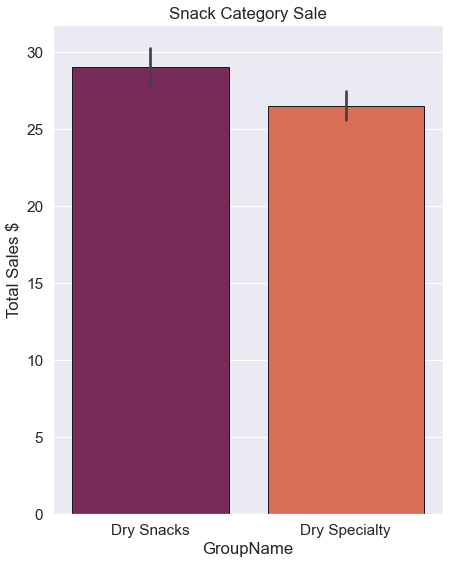

In [115]:
#bar chart
sns.set(rc={'figure.figsize':(7,9)})
sns.set(font_scale = 1.4)
sns.barplot(data=df_nov18_feb21,x='GroupName',y='Total Sales $',palette='rocket',edgecolor=".1")
plt.title("Snack Category Sale")
plt.show()

### 7. Side by side bar plot depicting sale made by snack categories from different warehouses

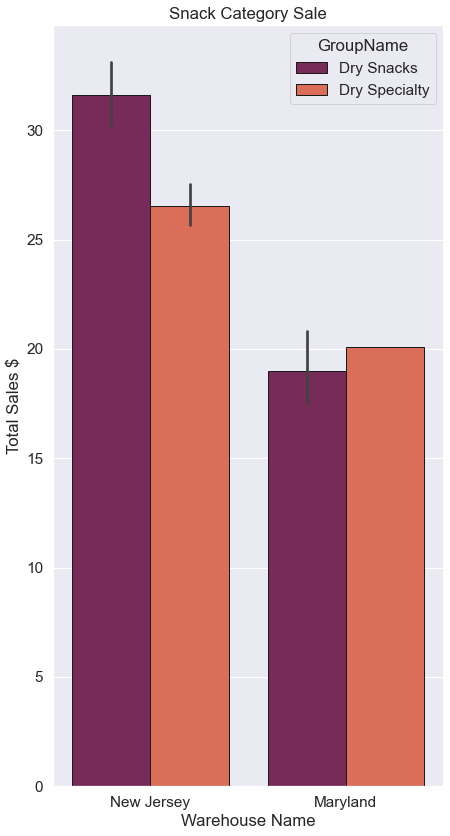

In [116]:
#dealing with similar warehouse names
df_nov18_feb21['Warehouse Name']=df_nov18_feb21['Warehouse Name'].str.replace('Maryland - EMW','Maryland')

#bar chart
sns.set(rc={'figure.figsize':(7,14)})
sns.set(font_scale = 1.4)
sns.barplot(data=df_nov18_feb21,x='Warehouse Name',y='Total Sales $',hue='GroupName',palette='rocket',edgecolor=".1")
plt.title("Snack Category Sale")
plt.show()